In [ ]:
"""import self-written functions"""
import numpy as np
import matplotlib.pyplot as plt

from utility_functions import get_words,performance,compare_to_gpt_encoding
from BPE_function import bpe,get_best_merges

In [ ]:
"""read training and test data"""
with open (r"corpora/Shakespeare_clean_train.txt", 'r') as f:
  text_train = f.read()
with open (r"corpora/Shakespeare_clean_valid.txt", 'r') as f:
  text_valid = f.read()
with open (r"corpora/Shakespeare_clean_test.txt", 'r') as f:
  text_test = f.read()


In [ ]:
dict_train = get_words(text_train)
performances = []
min_perform = 101
ks = []

for i in range(1,2001,100):
    vocab_train, sorted_token_freq_train, dict_matrix_train = bpe(dict_train,i)
    perform = performance(dict_train,vocab_train,500)
    print(perform)
    performances.append(perform)
    ks.append(i)
    if perform >= 75:
        if perform < min_perform:
            min_perform = int(perform)
            min_k = i



2.1999999999999997
min k: 101
7.6
min k: 101
13.200000000000001
min k: 101
21.0
min k: 101
27.6
min k: 101
34.2
min k: 101
41.199999999999996
min k: 101
48.8
min k: 101
57.599999999999994
min k: 101
66.0
min k: 101
73.8
min k: 101
83.0
min k: 83
91.4
min k: 83
98.0
min k: 83
100.0
min k: 83
100.0
min k: 83
100.0
min k: 83
100.0
min k: 83
100.0
min k: 83
100.0
min k: 83


'result =(ks,performances)\n\nwith open("ks_vs_performance.txt", "w") as k_vs_performance:\n  for item in result:\n     k_vs_performance.write(f"{item}\n")\n\nwith open("k_vs_performance.txt", "r") as f:\n    k_vs_performance = f.read().splitlines()'

In [ ]:
print(int(min_perform))
min_perform = int(min_perform)
print(min_k)

83
1101


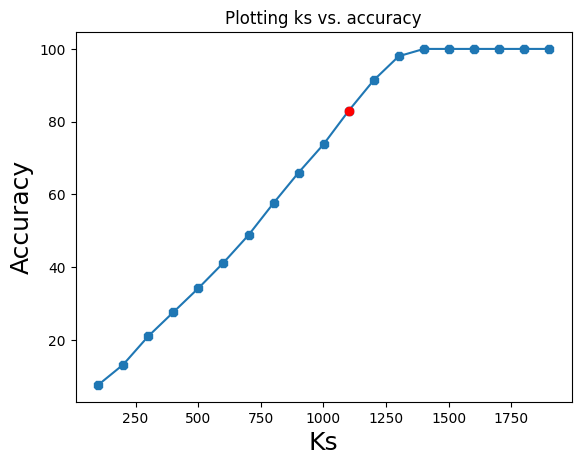

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
x = ks[1:]
y = performances[1:]
ax.plot(x, y, marker = '8')
ax.plot(min_k, min_perform, marker="o", color="red")
ax.set_title('Plotting ks vs. accuracy')
ax.set_xlabel('Ks', fontsize = 18)
ax.set_ylabel('Accuracy', fontsize = 18)
plt.show()

fig.savefig('ks_vs_accuracy.png')

In [ ]:
with open (r"corpora/Shakespeare_clean_valid.txt", 'r') as f:
  text_valid = f.read()
  
dict_train = get_words(text_train)
dict_valid = get_words(text_valid)
dict_test = get_words(text_test)

best_k,best_perplexity,best_n_gram,second_best_k,second_best_perplexity,second_best_n_gram,third_best_k,third_best_perplexity,third_best_n_gram,ks,n_gram_num,perplexities = get_best_merges(dict_train,text_train,dict_valid,text_valid,min_k,2001,100)
result = ["best k:",best_k,"best n gram", best_n_gram,"best k perplexity:",best_perplexity,"2nd best k:",second_best_k,"2nd best n gram", second_best_n_gram,"2nd best k perplexity:",second_best_perplexity,"3rd best k:",third_best_k,"3rd best n gram",third_best_n_gram,"3rd best k perplexity:",third_best_perplexity]
with open("k_merges_n_gram.txt", "w") as k_merges_n_gram:
  for item in result:
     k_merges_n_gram.write(f"{item}\n")


N-gram split for 1-gram, k = 1101: [['the_'], ['tra'], ['ge'], ['dy_'], ['of_'], ['antony_'], ['and_'], ['cleopatra_'], ['dra'], ['ma']]
Old perplexity: 100000000.00016147
Perplexity: 440.26
N-gram split for 2-gram, k = 1101: [['the_', 'tra'], ['tra', 'ge'], ['ge', 'dy_'], ['dy_', 'of_'], ['of_', 'antony_'], ['antony_', 'and_'], ['and_', 'cleopatra_'], ['cleopatra_', 'dra'], ['dra', 'ma'], ['ma', 'tis_']]
Old perplexity: 474.90514729663755
Perplexity: 154.04
N-gram split for 3-gram, k = 1101: [['the_', 'tra', 'ge'], ['tra', 'ge', 'dy_'], ['ge', 'dy_', 'of_'], ['dy_', 'of_', 'antony_'], ['of_', 'antony_', 'and_'], ['antony_', 'and_', 'cleopatra_'], ['and_', 'cleopatra_', 'dra'], ['cleopatra_', 'dra', 'ma'], ['dra', 'ma', 'tis_'], ['ma', 'tis_', 'per']]
Old perplexity: 63271.61396610178
Perplexity: 496.18
N-gram split for 4-gram, k = 1101: [['the_', 'tra', 'ge', 'dy_'], ['tra', 'ge', 'dy_', 'of_'], ['ge', 'dy_', 'of_', 'antony_'], ['dy_', 'of_', 'antony_', 'and_'], ['of_', 'antony_', 'an

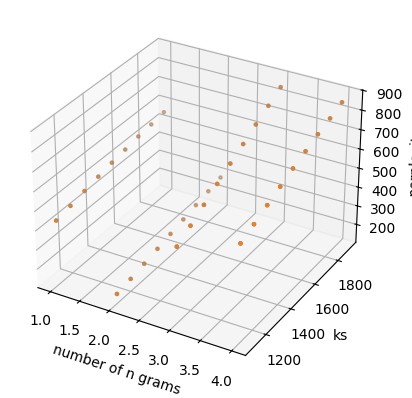

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:

    xs = np.array(n_gram_num)
    ys = np.array(ks)
    zs = np.array(perplexities)
    ax.scatter(xs, ys, zs, marker=".")

ax.set_xlabel('number of n grams')
ax.set_ylabel('ks')
ax.set_zlabel('perplexity')

plt.show()

fig.savefig('ks_vs_n_grams_perplexities.png')

In [ ]:
"""train a dictionary of byte pairs and their respective counts on training and test data"""
#extract words from the text
dict_train = get_words(text_train)
dict_test = get_words(text_test)

with open("k_merges_n_gram.txt", "r") as f:
	k_merges_n_gram_lines = f.read().splitlines()

best_k = int(k_merges_n_gram_lines[1])
second_best_k = int(k_merges_n_gram_lines[7])
third_best_k = int(k_merges_n_gram_lines[13])


#builds the byte pair vocabulary and the sorted token frequency
vocab_train_best_k, sorted_token_freq_train_best_k, dict_matrix_train_best_k = bpe(dict_train,best_k)
vocab_train_2nd_best_k, sorted_token_freq_train_2nd_best_k, dict_matrix_train_2nd_best_k = bpe(dict_train,second_best_k)
vocab_train_3rd_best_k, sorted_token_freq_train_3rd_best_k, dict_matrix_train_3rd_best_k = bpe(dict_train,third_best_k)

In [ ]:
"""test and print performance of training and test set"""
train_accuracy_best_k = performance(dict_train, vocab_train_best_k, 500)
train_accuracy_2nd_best_k = performance(dict_train, vocab_train_2nd_best_k, 500)
train_accuracy_3rd_best_k = performance(dict_train, vocab_train_3rd_best_k, 500)

test_accuracy_best_k = performance(dict_test, vocab_train_best_k, 500)
test_accuracy_2nd_best_k = performance(dict_test, vocab_train_2nd_best_k, 500)
test_accuracy_3rd_best_k = performance(dict_test, vocab_train_3rd_best_k, 500)

print("train accuracy best k: ", train_accuracy_best_k)
print("train accuracy 2nd best k: ", train_accuracy_2nd_best_k)
print("train accuracy 3rd best k: ", train_accuracy_3rd_best_k)

print("test accuracy best k: ", test_accuracy_best_k)
print("test accuracy 2nd best k: ", test_accuracy_2nd_best_k)
print("test accuracy 3rd best k: ", test_accuracy_3rd_best_k)

train accuracy best k:  83.0
train accuracy 2nd best k:  91.4
train accuracy 3rd best k:  98.0
test accuracy best k:  70.0
test accuracy 2nd best k:  75.6
test accuracy 3rd best k:  79.4


C:\Users\belan\AppData\Local\Temp\ipykernel_20744\3213009436.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


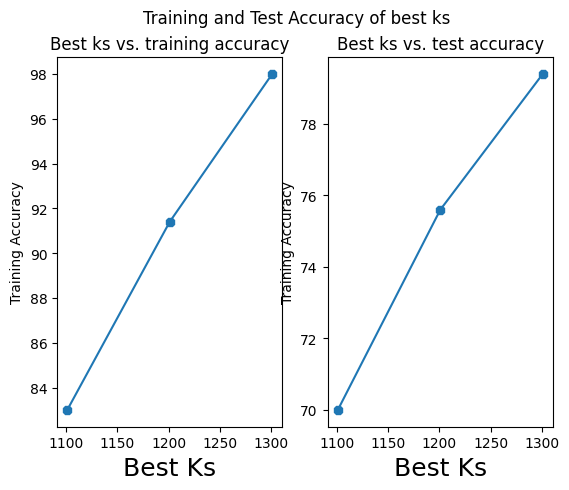

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Training and Test Accuracy of best ks')

x1 = [third_best_k, second_best_k, best_k]
y1 = [train_accuracy_3rd_best_k,train_accuracy_2nd_best_k,train_accuracy_best_k]

ax1.plot(x1, y1, marker = '8')
ax1.set_title('Best ks vs. training accuracy')
ax1.set_xlabel('Best Ks', fontsize = 18)
ax1.set_ylabel('Training Accuracy', fontsize = 10)

x2 = [third_best_k, second_best_k, best_k]
y2 = [test_accuracy_3rd_best_k,test_accuracy_2nd_best_k,test_accuracy_best_k]
ax2.plot(x2, y2, marker = '8')
ax2.set_title('Best ks vs. test accuracy')
ax2.set_xlabel('Best Ks', fontsize = 18)
ax2.set_ylabel('Training Accuracy', fontsize = 10)

fig.show()
fig.savefig('best_ks_vs_training_and_test_accuracy.png')

In [ ]:
"""compare our BPE split to split of another system (in this case gpt 3.5)"""

model_name="gpt-3.5-turbo"
tokens_train1 = compare_to_gpt_encoding(text_train, vocab_train_best_k, model_name)
tokens_train2 = compare_to_gpt_encoding(text_train, vocab_train_2nd_best_k, model_name)
tokens_train3 = compare_to_gpt_encoding(text_train, vocab_train_3rd_best_k, model_name)

tokens_test1 = compare_to_gpt_encoding(text_test, vocab_train_best_k, model_name)
tokens_test2 = compare_to_gpt_encoding(text_test, vocab_train_2nd_best_k, model_name)
tokens_test3 = compare_to_gpt_encoding(text_test, vocab_train_3rd_best_k, model_name)

print(f"{tokens_train1}\n,{tokens_train1}\n,{tokens_train3}\n,{tokens_test1}\n,{tokens_test2}\n,{tokens_test3}")

0.45866141732283466
,0.45866141732283466
,0.4241666666666667
,0.22440944881889763
,0.2110009017132552
,0.20083333333333334


C:\Users\belan\AppData\Local\Temp\ipykernel_20744\1377643517.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


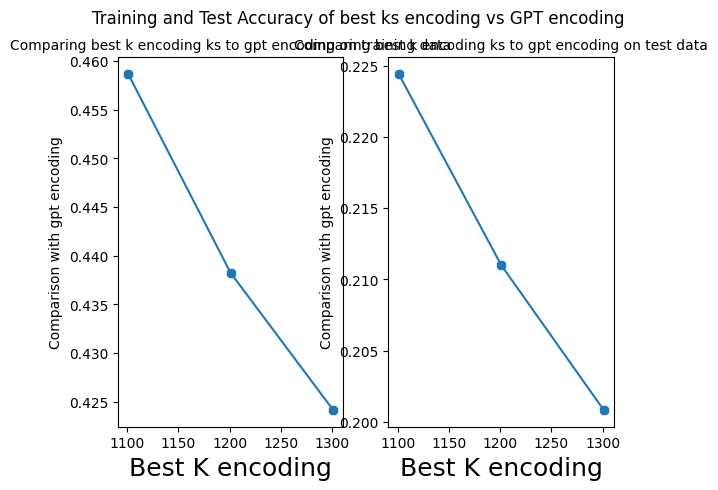

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Training and Test Accuracy of best ks encoding vs GPT encoding')

x1 = [third_best_k, second_best_k, best_k]
y1 = [tokens_train3,tokens_train2,tokens_train1]

ax1.plot(x1, y1, marker = '8')
ax1.set_title('Comparing best k encoding ks to gpt encoding on training data',fontsize = 10)
ax1.set_xlabel('Best K encoding', fontsize = 18)
ax1.set_ylabel('Comparison with gpt encoding', fontsize = 10)

x2 = [third_best_k, second_best_k, best_k]
y2 = [tokens_test3,tokens_test2,tokens_test1]
ax2.plot(x2, y2, marker = '8')
ax2.set_title('Comparing best k encoding ks to gpt encoding on test data',fontsize = 10)
ax2.set_xlabel('Best K encoding', fontsize = 18)
ax2.set_ylabel('Comparison with gpt encoding', fontsize = 10)

fig.show()
fig.savefig('best_ks_vs_gpt_encoding_training_and_test.png')


In [ ]:
"""run BPE split on different (non-shakespearean) test set and evaluate performance"""
with open ('corpora/friends.txt', 'r') as f:
  friends = f.read()

friends_dict = get_words(friends)
friends_accuracy = performance(friends_dict, vocab_train_best_k, 500)
friends_accuracy = performance(friends_dict, vocab_train_2nd_best_k, 500)
friends_accuracy = performance(friends_dict, vocab_train_3rd_best_k, 500)

print("Accuracy on Friends: ", friends_accuracy)

#also compare to gpt encoding of BPE split
tokens_friends = compare_to_gpt_encoding(friends, vocab_train_best_k, model_name)
tokens_friends = compare_to_gpt_encoding(friends, vocab_train_2nd_best_k, model_name)
tokens_friends = compare_to_gpt_encoding(friends, vocab_train_3rd_best_k, model_name)

NameError: name 'get_words' is not defined

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Training and Test Acczracy of best ks')

x1 = [third_best_k, second_best_k, best_k]
y1 = [tokens_train3,tokens_train2,tokens_train1]

ax1.plot(x1, y1, marker = '8')
ax1.set_title('Comparing best k encoding ks to gpt encoding on training data')
ax1.set_xlabel('Best K encoding', fontsize = 18)
ax1.set_ylabel('Comparison with gpt encoding', fontsize = 18)

x2 = [third_best_k, second_best_k, best_k]
y2 = [tokens_test3,tokens_test2,tokens_test1]
ax2.plot(x2, y2, marker = '8')
ax2.set_title('Comparing best k encoding ks to gpt encoding on test data')
ax2.set_xlabel('Best K encoding', fontsize = 18)
ax2.set_ylabel('Comparison with gpt encoding', fontsize = 18)

fig.show()
fig.savefig('best_ks_vs_gpt_encoding_training_and_test.png')